In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [2]:
np.random.seed(42)

# Giả định phân phối xác suất cho biến

## Dữ liệu từ mô phỏng

### Tạo số ngẫu nhiên từ phân phối đều


$$
x_0 = 0
$$

$$
x_i \equiv (ax_{i - 1} + c) \pmod m
$$

In [3]:
m, a, c = 2 ** 10, 13, 203

In [4]:
x_0 = 0

In [5]:
x_list = np.array([x_0], dtype=np.int64)
for i in range(1, 11):
    current_x = (a * x_list[-1] + c) % m
    x_list = np.append(x_list, [current_x], axis = 0)

In [6]:
x_list

array([  0, 203, 794, 285, 836, 831, 766, 945, 200, 755, 802], dtype=int64)

### Tạo số ngẫu nhiên từ phân phối chuẩn

In [7]:
u1, u2 = np.random.uniform(0, 1, 1000), np.random.uniform(0, 1, 1000)

In [8]:
# u1, u2

In [9]:
theta = 2 * np.pi * u1
r = np.sqrt(-2 * np.log(u2))

In [10]:
# theta, r

In [11]:
x = r * np.cos(theta)
y = r * np.sin(theta)

In [12]:
# x, y

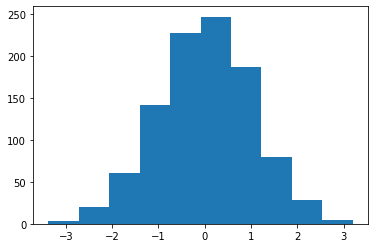

In [13]:
plt.hist(x)
plt.show()

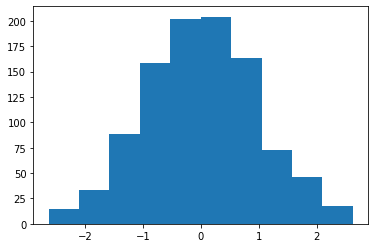

In [14]:
plt.hist(y)
plt.show()

### Tạo số ngẫu nhiên từ phân phối rời rạc

- Poisson (biến đổi ngược)
- Bác bỏ (dạng đặc biệt của Monte-carlo)

Ước lượng $\pi$ bằng Monte-Carlo:

In [15]:
x, y = np.random.uniform(0, 1, 1000), np.random.uniform(0, 1, 1000)

In [16]:
list_points = [1 if (np.sqrt((point[0] - .5) ** 2 + (point[1] - .5) ** 2) < .5) else 0 for point in zip(x, y)]

In [17]:
drawable_x = []
drawable_y = []
accepted_points = []
for point in zip(x, y):
    if (np.sqrt((point[0] - .5) ** 2 + (point[1] - .5) ** 2) < .5):
        drawable_x.append(point[0])
        drawable_y.append(point[1])

In [18]:
estimated_pi = 4 * np.sum(list_points) / len(x)

In [19]:
estimated_pi

3.16

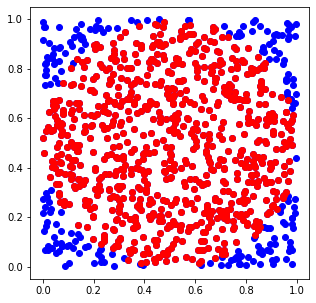

In [20]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(x, y, color="b")
plt.scatter(drawable_x, drawable_y, color = "r")
plt.show()

### Lấy mẫu theo 1 phân phối

Gieo 2 con xúc sắc, tính xác suất tổng $\geq 8$

Lý thuyết: $p(\text{sum} \geq 8) = \frac{5}{36} \approx 0.1389$

In [21]:
n_size = 10000

In [22]:
first, second = np.random.randint(1, 7, n_size), np.random.randint(1, 7, n_size)

In [23]:
accepted = [1 if f + s == 8 else 0 for f, s in zip(first, second)]

In [24]:
np.sum(accepted) / n_size

0.1394

# Ensemble

## Bootstrap training data

- Datapoint có thể nhiều / ít mẫu hơn dataset gốc
- Dùng với imbalanced data: lấy sample data "thọt" nhiều hơn cho cân bằng

Ví dụ ensemble cho Linear Regression 

- Với dataset $\mathcal{B}_1$, tính được $w_0^1, w_1^1$
- ..
- Với dataset $\mathcal{B}_n$, tính được $w_0^n, w_1^n$

Từ đây đưa ra được $w_0 \pm .., w_1 \pm ..$

## Phân tích hồi quy bội (hồi quy đa biến)

- Hàm biến đổi: thêm biến mới
- Trong $n$ biến $X_1, X_2, .., X_d$, biến nào là biến tốt nhất? $\Rightarrow$ dùng 1 tập con của $n$ biến, không nhất thiết xài hết.

Học máy: độ lỗi nhỏ nhất -> chọn

Mô hình thống kê: likelihood (càng lớn càng tốt), $R^2$ (càng lớn càng tốt), AIC, BIC

### Example: B8.1

In [26]:
y = np.array([6, 8, 8, 7, 7, 12, 9, 8, 9, 10, 10, 11, 9, 10, 11])
x1 = np.array([9, 10, 8, 7, 10, 4, 5, 5, 6, 8, 7, 4, 9, 5, 8])
x2 = np.array([8, 13, 11, 10, 12, 16, 10, 10, 12, 14, 12, 16, 14, 10, 12])

In [27]:
df = pd.DataFrame({"x1" : x1, "x2": x2, "y" : y})

In [28]:
result = smf.ols("y ~ x1 + x2", df).fit()

In [29]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     13.56
Date:                Sat, 27 May 2023   Prob (F-statistic):           0.000834
Time:                        10:57:03   Log-Likelihood:                -19.779
No. Observations:                  15   AIC:                             45.56
Df Residuals:                      12   BIC:                             47.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2030      1.862      3.331      0.0

D:\Software\Python\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
